In [28]:
import numpy as np
from sympy.geometry import Point,Circle,Segment,intersection
import matplotlib.pyplot as plt
from matplotlib.patches import Arc as Arc_patch
from matplotlib import collections  as mc
import time


In [2]:
class Arc:
    def __init__(self,r,theta1,theta2,origin = (0,0)):
        x,y = origin
        self.x = x
        self.y = y
        self.r = r
        self.origin = origin
        self.theta1 = theta1
        self.theta2 = theta2
        self.endpoints = [Point(self.x+r*np.cos(theta1),self.y+r*np.sin(theta1)),Point(self.x+r*np.cos(theta2),self.y+r*np.sin(theta2))]
        self.circle = Circle(Point(x,y),r)  
        
    def encloses(self,point):
        xp,yp = float(point.x)-self.x,float(point.y)-self.y
        theta = np.arctan2(yp,xp) if yp>=0 else 2*np.pi + np.arctan2(yp,xp)
        if (theta>=self.theta1 and theta<=self.theta2) or \
           (theta>=self.theta2 and theta<=self.theta1):
            return True
        else:
            return False

    def draw(self,ax,color):
        ax.add_patch(Arc_patch((self.x, self.y), 2*self.r,2*self.r, theta1=np.rad2deg(self.theta1), theta2=np.rad2deg(self.theta2), linewidth=1, color=color))       


In [3]:
def arc_arc(gamma2,gamma2prime):
    eta,etaprime = gamma2.circle,gamma2prime.circle
    intersect = intersection(eta,etaprime)
    pts = []
    if len(intersect) > 0:
        if gamma2.encloses(intersect[0]) and gamma2prime.encloses(intersect[0]):
            pts.append(intersect[0])
    if len(intersect) > 1:
        if gamma2.encloses(intersect[1]) and gamma2prime.encloses(intersect[1]):
            pts.append(intersect[1])    
        
    return pts

In [4]:
def line_line(l1,l2):
    return intersection(l1,l2)

In [5]:
def line_arc(l1prime,gamma2):
    intersect = intersection(l1prime,gamma2.circle)
    pts = []
    if len(intersect)>0:
        if gamma2.encloses(intersect[0]):
            pts.append(intersect[0])
    if len(intersect)>1:
        if gamma2.encloses(intersect[1]):
            pts.append(intersect[1]) 
    return pts        
        

In [6]:
class Interval:
    def __init__(self,r1,r2,theta1,theta2,origin=(0,0)):
        
        if r1>r2:
            r1,r2 = r2,r1
        
        if theta1>theta2:
            theta1,theta2 = theta2,theta1
            
        not_zero = lambda x: x if x != 0.0 else 1e-6    
        r1,r2,theta1,theta2 =  list(map(not_zero,[r1,r2,theta1,theta2]))  
        
        self.r1 = r1
        self.r2 = r2  
        self.theta1 = theta1
        self.theta2 = theta2
        x,y = origin
        self.origin = origin
        self.x = x
        self.y = y
        self.gamma1 = Arc(r1,theta1,theta2,origin=origin)
        self.gamma2 = Arc(r2,theta1,theta2,origin=origin)
        self.l1 = Segment((x+r1*np.cos(theta1),y+r1*np.sin(theta1)),(x+r2*np.cos(theta1),y+r2*np.sin(theta1)))
        self.l2 = Segment((x+r1*np.cos(theta2),y+r1*np.sin(theta2)),(x+r2*np.cos(theta2),y+r2*np.sin(theta2)))
        self.l = [self.l1,self.l2]
        self.gamma = [self.gamma1,self.gamma2]

    def __contains__(self,point):
        r = np.linalg.norm(np.array((float(point.x),float(point.y)))-np.array(self.origin))
        return (r<=self.r2 and r>=self.r1) and self.gamma1.encloses(point)    
    
    def __repr__(self):
        return f"Interval({self.r1},{self.r2},{self.theta1},{self.theta2},{self.origin})"
    
    def draw(self,ax,color):
        try:
            l11, l12 = tuple(self.l1.points[0]),tuple(self.l1.points[1])
            l21, l22 = tuple(self.l2.points[0]),tuple(self.l2.points[1])
            lc = mc.LineCollection([[l11,l12],[l21,l22]], colors = color, linewidths=1)
            self.gamma1.draw(ax,color)
            self.gamma2.draw(ax,color)
            ax.add_collection(lc) 
            
        except AttributeError:
            self.gamma1.draw(ax,color)
            self.gamma2.draw(ax,color)
            

In [7]:
def cart2pol(pt):
    x,y = float(pt.x),float(pt.y)
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y,x) if y>=0 else 2*np.pi + np.arctan2(y,x)
    return [rho, phi]

In [ ]:
def expts(**kwargs):
    if 'gamma' in kwargs and 'gammaprime' in kwargs:
        gamma = kwargs['gamma']
        gammaprime = kwargs['gammaprime']
        d = np.linalg.norm(np.array(gamma.origin)-np.array(gammaprime.origin))
        if d >= gamma.r:
            rmin = d - gammaprime.r
            return [rmin]
        return []
    if 'l' in kwargs and 'gammaprime' in kwargs:
        l = kwargs['l']
        gammaprime = kwargs['gammaprime']
        d = np.linalg.norm(np.array(I.origin)-np.array(gammaprime.origin))
        phi = cart2pol(Point(Iprime.origin))[1]
        thi = np.arcsin(gammaprime.r/d)
        thetae = phi + thi*(1 if phi+thi>cart2pol(l.points[0])[1] else -1)
        return [thatae]
    if 'gamma' in kwargs and 'lprime' in kwargs:
        lprime = kwargs['lprime']
        
        return [lprime.midpoint]
    
    
        
            

In [16]:
max([0,0,1,0,None])

TypeError: '>' not supported between instances of 'NoneType' and 'int'

In [70]:
def fast_inclusion(I,Iprime):
    def expts(**kwargs):
        if 'gamma' in kwargs and 'gammaprime' in kwargs:
            gamma = kwargs['gamma']
            gammaprime = kwargs['gammaprime']
            d = np.linalg.norm(np.array(gamma.origin)-np.array(gammaprime.origin))
            if d >= gamma.r:
                rmin = d - gammaprime.r
                return [rmin]
            return []
        if 'l' in kwargs and 'gammaprime' in kwargs:
            l = kwargs['l']
            gammaprime = kwargs['gammaprime']
            d = np.linalg.norm(np.array(I.origin)-np.array(gammaprime.origin))
            phi = cart2pol(Point(Iprime.origin))[1]
            thi = np.arcsin(gammaprime.r/d)
            thetae = phi + thi*(1 if (phi+thi>=I.theta1 and phi+thi<=I.theta2) else -1)
            return [thetae]
        if 'gamma' in kwargs and 'lprime' in kwargs:
            lprime = kwargs['lprime']

            return [lprime.midpoint]
    rs = []
    thetas = []
    test_pts = []
    
    for gmi in I.gamma:
        for gmp in Iprime.gamma:
            pts = arc_arc(gmi,gmp)
            if len(pts) == 2:
                rs += expts(gamma=gmi,gammaprime=gmp)
            test_pts += pts    
        for lp in Iprime.l:
            pts = line_arc(lp,gmi)
            if len(pts) == 2:
                test_pts += expts(lprime=lp,gamma=gmi)
            test_pts += pts 
    for li in I.l:
        for gmp in Iprime.gamma:
            pts = line_arc(li,gmp)
            if len(pts)==2:
                thetas += expts(l=li,gammaprime=gmp) 
            test_pts += pts    
        for lp in Iprime.l:
            test_pts += line_line(li,lp) 
    if I.gamma2.encloses(Point(Iprime.origin)) and Iprime.gamma2.encloses(Point(I.origin)):
        rs += expts(gamma=I.gamma2,gammaprime=Iprime.gamma2)
    for point in Iprime.gamma2.endpoints+Iprime.gamma1.endpoints:
        if point in I:
            test_pts+= [point]
            
    rad_pts = np.array(list(map(cart2pol,test_pts)))
    if len(rad_pts) == 0:
        return Interval(0,0,0,0,I.origin)
        
    radii = list(rad_pts[:,0]) + rs
    thetas = list(rad_pts[:,1]) + thetas
    rmax,rmin = max(radii),min(radii)
    thetamax,thetamin = max(thetas),min(thetas)
    return Interval(rmin,rmax,thetamin,thetamax,I.origin)
    
    
  
    
            
        
    

In [62]:
#def fast_analysis(self,Iprime):
    def expts(**kwargs):
        if 'gamma' in kwargs and 'gammaprime' in kwargs:
            gamma = kwargs['gamma']
            gammaprime = kwargs['gammaprime']
            d = np.linalg.norm(np.array(gamma.origin)-np.array(gammaprime.origin))
            if d >= gamma.r:
                rmin = d - gammaprime.r
                return [rmin]
            return []
        if 'l' in kwargs and 'gammaprime' in kwargs:
            l = kwargs['l']
            gammaprime = kwargs['gammaprime']
            d = np.linalg.norm(np.array(self.origin)-np.array(gammaprime.origin))
            phi = cart2pol(Point(Iprime.origin))[1]
            thi = np.arcsin(gammaprime.r/d)
            thetae = phi + thi*(1 if phi+thi>cart2pol(l.points[0])[1] else -1)
            return [thetae]
        if 'gamma' in kwargs and 'lprime' in kwargs:
            lprime = kwargs['lprime']

            return [lprime.midpoint]
    rs = []
    thetas = []
    test_pts = []
    
    for gmi in self.gamma:
        for gmp in Iprime.gamma:
            pts = arc_arc(gmi,gmp)
            if len(pts) == 2:
                rs += expts(gamma=gmi,gammaprime=gmp)
            test_pts += pts    
        for lp in Iprime.l:
            pts = line_arc(lp,gmi)
            if len(pts) == 2:
                test_pts += expts(lprime=lp,gamma=gmi)
            test_pts += pts 
    for li in self.l:
        for gmp in Iprime.gamma:
            pts = line_arc(li,gmp)
            if len(pts)==2:
                thetas += expts(l=li,gammaprime=gmp) 
            test_pts += pts    
        for lp in Iprime.l:
            test_pts += line_line(li,lp) 
    if I.gamma2.encloses(Point(Iprime.origin)) and Iprime.gamma2.encloses(Point(I.origin)):
        rs += expts(gamma=I.gamma2,gammaprime=Iprime.gamma2)
    for point in Iprime.gamma2.endpoints+Iprime.gamma1.endpoints:
        if point in I:
            test_pts+= [point]
            
    rad_pts = np.array(list(map(cart2pol,test_pts)))
    print("rs = ", rs, "thetas = ",thetas)
    if len(rad_pts) == 0:
        return Interval(0,0,0,0,I.origin)
        
    radii = list(rad_pts[:,0]) + rs
    thetas = list(rad_pts[:,1]) + thetas
    rmax,rmin = max(radii),min(radii)
    thetamax,thetamin = max(thetas),min(thetas)
    return Interval(rmin,rmax,thetamin,thetamax,I.origin)
    
    
  
    
            
        
    

IndentationError: unexpected indent (<ipython-input-62-8b4f91268a13>, line 2)

In [44]:

#def fast_inclusion(I,Iprime):
    def expts(**kwargs):
        if 'gamma' in kwargs and 'gammaprime' in kwargs:
            gamma = kwargs['gamma']
            gammaprime = kwargs['gammaprime']
            d = np.linalg.norm(np.array(gamma.origin)-np.array(gammaprime.origin))
            print(d)
            if d >= gamma.r:
                rmin = d - gammaprime.r
                return [rmin]
            return []
        if 'l' in kwargs and 'gammaprime' in kwargs:
            l = kwargs['l']
            gammaprime = kwargs['gammaprime']
            d = np.linalg.norm(np.array(I.origin)-np.array(gammaprime.origin))
            phi = cart2pol(Point(Iprime.origin))[1]
            thi = np.arcsin(gammaprime.r/d)
            thetae = phi + thi*(1 if phi+thi>cart2pol(l.points[0])[1] else -1)
            return [thatae]
        if 'gamma' in kwargs and 'lprime' in kwargs:
            lprime = kwargs['lprime']

            return [lprime.midpoint]
    rs = []
    thetas = []
    test_pts = []
    num_log = np.zeros((4,4)).astype('int')
    
    for i,gmi in enumerate(I.gamma):
        for j,gmp in enumerate(Iprime.gamma):
            pts = arc_arc(gmi,gmp)
#             if len(aapts) == 2:
#                 rs += expts(gamma=gmi,gammaprime=gmp)
            num_log[i,j] = len(pts)
            test_pts += pts    
        for j,lp in enumerate(Iprime.l):
            pts = line_arc(lp,gmi)
#             if len(lapts) == 2:
#                 test_pts += expts(lprime=lp,gamma=gmi)
            num_log[i,j+2] = len(pts)
            test_pts += pts 
    for i,li in enumerate(I.l):
        for j,gmp in enumerate(Iprime.gamma):
            pts = line_arc(li,gmp)
#             if len(pts)==2:
#                 thetas += expts(l=li,gammaprime=gmp) 
            num_log[i+2,j] = len(pts)
            test_pts += pts    
        for j,lp in enumerate(Iprime.l):
            pts += line_line(li,lp) 
            num_log[i+2,j+2] = len(pts)
            test_pts += pts
    for point in Iprime.gamma2.endpoints+Iprime.gamma1.endpoints:
        if point in I:
            test_pts+= [point]
            
    rad_pts = np.array(list(map(cart2pol,test_pts)))
    print("rs = ", rs, "thetas = ",thetas)
    if len(rad_pts) == 0:
        return Interval(0,0,0,0,I.origin)
        
    radii = list(rad_pts[:,0]) + rs
    thetas = list(rad_pts[:,1]) + thetas
    rmax,rmin = max(radii),min(radii)
    thetamax,thetamin = max(thetas),min(thetas)
    return Interval(rmin,rmax,thetamin,thetamax,I.origin)
    
    
  
    
            
        
    

In [49]:
np.zeros((4,4)).astype('int')

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

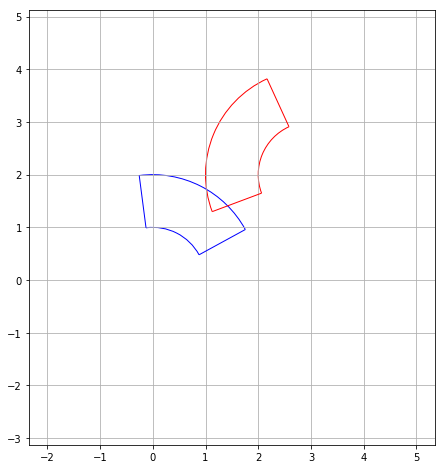

In [9]:
I2 = Interval(1,2,2,3.5,origin=(3,2))
I1 = Interval(1,2,0.5,1.7,origin=(0,0))
# t0 = time.time()
# J = interval_analysis(I1,I2,10,20)
# t1 = time.time()
# print("computation time = ",t1-t0)
fig= plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,2,1)
I2.draw(ax,'red')
I1.draw(ax,'blue')
plt.axis('equal')
plt.grid()
# ax1 = fig.add_subplot(1,2,2)
# J.draw(ax1,'green')
# I2.draw(ax1,'red')
# I1.draw(ax1,'blue')
# plt.axis('equal')
# plt.grid()
plt.show()

computation time =  2.811012029647827


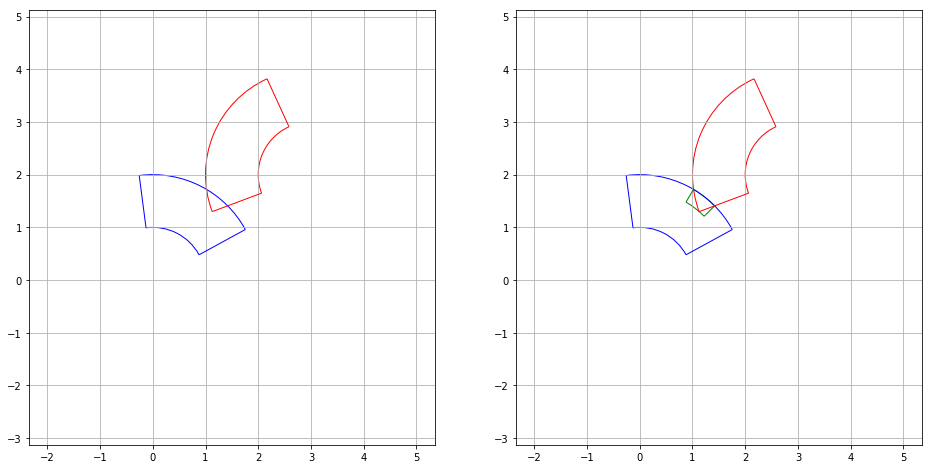

In [31]:
I2 = Interval(1,2,2,3.5,origin=(3,2))
I1 = Interval(1,2,0.5,1.7,origin=(0,0))
t0 = time.time()
J = fast_inclusion(I1,I2)
t1 = time.time()
print("computation time = ",t1-t0)
fig= plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,2,1)
I2.draw(ax,'red')
I1.draw(ax,'blue')
plt.axis('equal')
plt.grid()
ax1 = fig.add_subplot(1,2,2)
J.draw(ax1,'green')
I2.draw(ax1,'red')
I1.draw(ax1,'blue')
plt.axis('equal')
plt.grid()
plt.show()

computation time =  3.9465126991271973


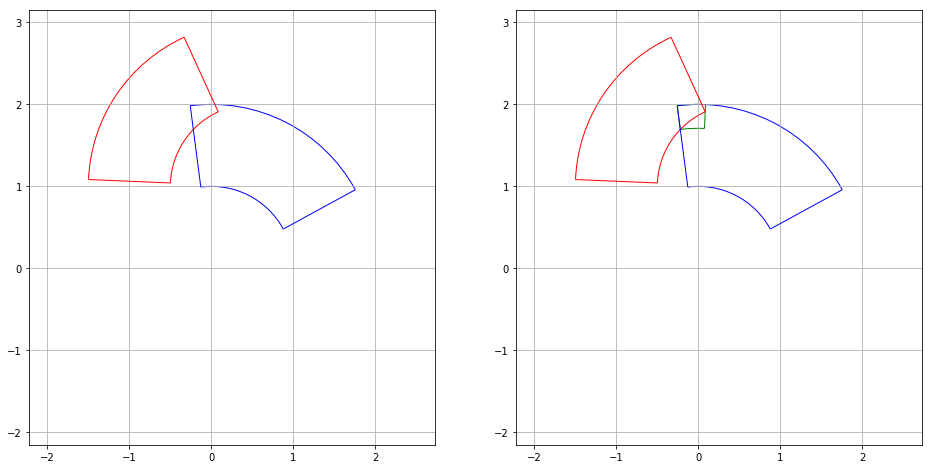

In [32]:
I2 = Interval(1,2,2,3.1,origin=(0.5,1))
I1 = Interval(1,2,0.5,1.7,origin=(0,0))
t0 = time.time()
J = fast_inclusion(I1,I2)
t1 = time.time()
print("computation time = ",t1-t0)
fig= plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,2,1)
I2.draw(ax,'red')
I1.draw(ax,'blue')
plt.axis('equal')
plt.grid()
ax1 = fig.add_subplot(1,2,2)
J.draw(ax1,'green')
I2.draw(ax1,'red')
I1.draw(ax1,'blue')
plt.axis('equal')
plt.grid()
plt.show()

3.605551275463989
rs =  [1.6055512754639891] thetas =  []
computation time =  2.1612250804901123


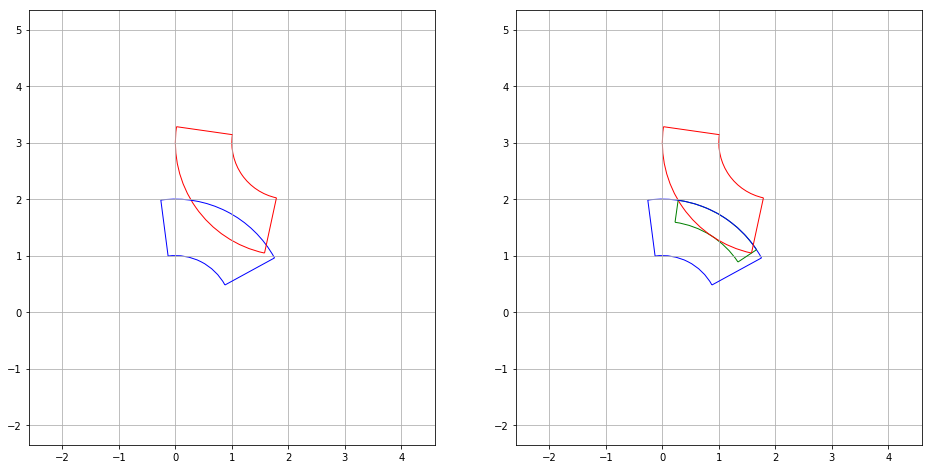

In [53]:
I2 = Interval(1,2,3,4.5,origin=(2,3))
I1 = Interval(1,2,0.5,1.7,origin=(0,0))
t0 = time.time()
J = fast_inclusion(I1,I2)
t1 = time.time()
print("computation time = ",t1-t0)
fig= plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,2,1)
I2.draw(ax,'red')
I1.draw(ax,'blue')
plt.axis('equal')
plt.grid()
ax1 = fig.add_subplot(1,2,2)
J.draw(ax1,'green')
I2.draw(ax1,'red')
I1.draw(ax1,'blue')
plt.axis('equal')
plt.grid()
plt.show()

########################### catch exception

3.8587562763149474
rs =  [1.8587562763149474] thetas =  []
computation time =  2.782761573791504


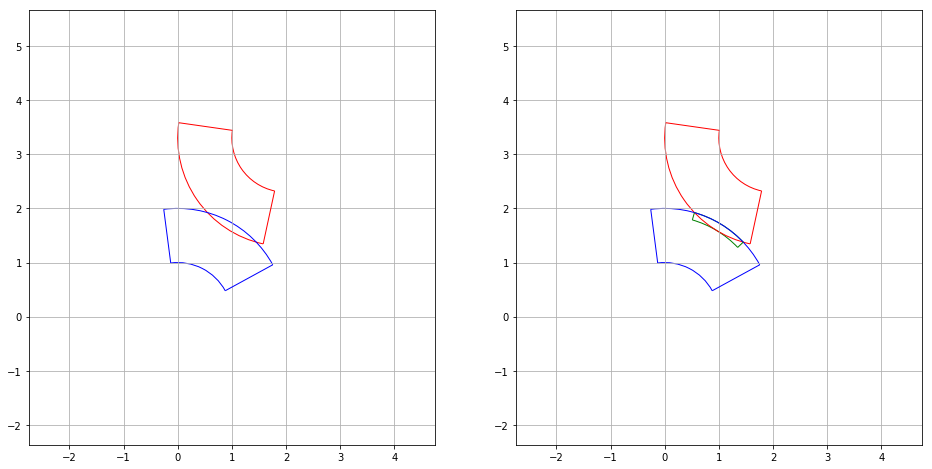

In [39]:
I2 = Interval(1,2,3,4.5,origin=(2,3.3))
I1 = Interval(1,2,0.5,1.7,origin=(0,0))
t0 = time.time()
J = fast_inclusion(I1,I2)
t1 = time.time()
print("computation time = ",t1-t0)
fig= plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,2,1)
I2.draw(ax,'red')
I1.draw(ax,'blue')
plt.axis('equal')
plt.grid()
ax1 = fig.add_subplot(1,2,2)
J.draw(ax1,'green')
I2.draw(ax1,'red')
I1.draw(ax1,'blue')
plt.axis('equal')
plt.grid()
plt.show()



rs =  [] thetas =  []
computation time =  3.141238212585449


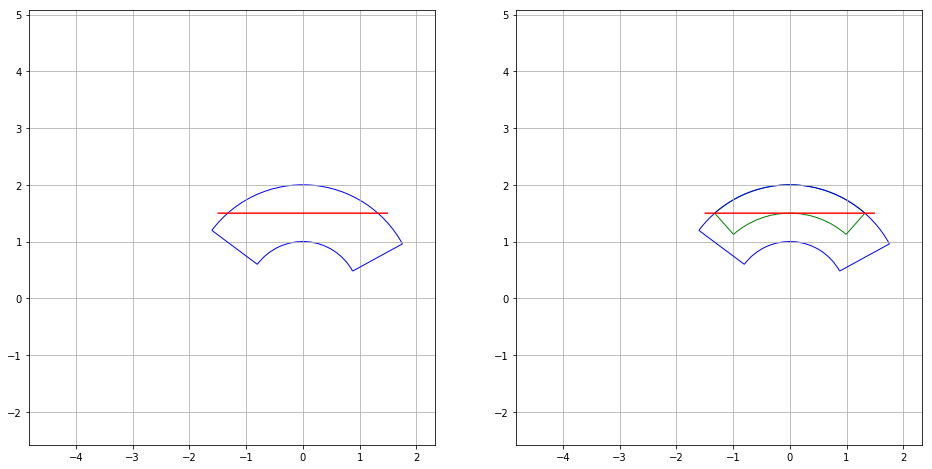

In [40]:
I2 = Interval(3,0.0+1e-6,1e-6,1e-6,origin=(-1.5,1.5))
I1 = Interval(1,2,0.5,2.5,origin=(0,0))
t0 = time.time()
J = fast_inclusion(I1,I2)
t1 = time.time()
print("computation time = ",t1-t0)
fig= plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,2,1)
I2.draw(ax,'red')
I1.draw(ax,'blue')
plt.axis('equal')
plt.grid()
ax1 = fig.add_subplot(1,2,2)
J.draw(ax1,'green')
I2.draw(ax1,'red')
I1.draw(ax1,'blue')
plt.axis('equal')
plt.grid()
plt.show()



rs =  [] thetas =  []
computation time =  4.067622661590576


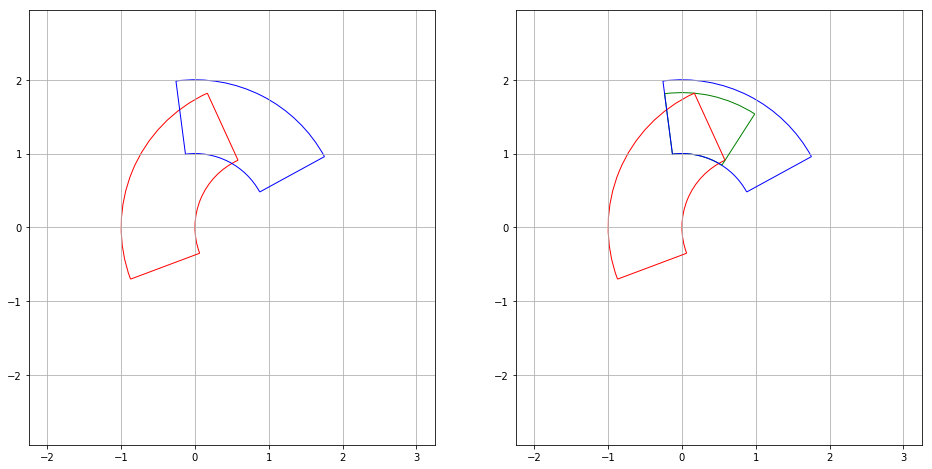

In [41]:
I2 = Interval(1,2,2,3.5,origin=(1,0))
I1 = Interval(1,2,0.5,1.7,origin=(0,0))
t0 = time.time()
J = fast_inclusion(I1,I2)
t1 = time.time()
print("computation time = ",t1-t0)
fig= plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,2,1)
I2.draw(ax,'red')
I1.draw(ax,'blue')
plt.axis('equal')
plt.grid()
ax1 = fig.add_subplot(1,2,2)
J.draw(ax1,'green')
I2.draw(ax1,'red')
I1.draw(ax1,'blue')
plt.axis('equal')
plt.grid()
plt.show()



rs =  [] thetas =  []
computation time =  2.05250883102417


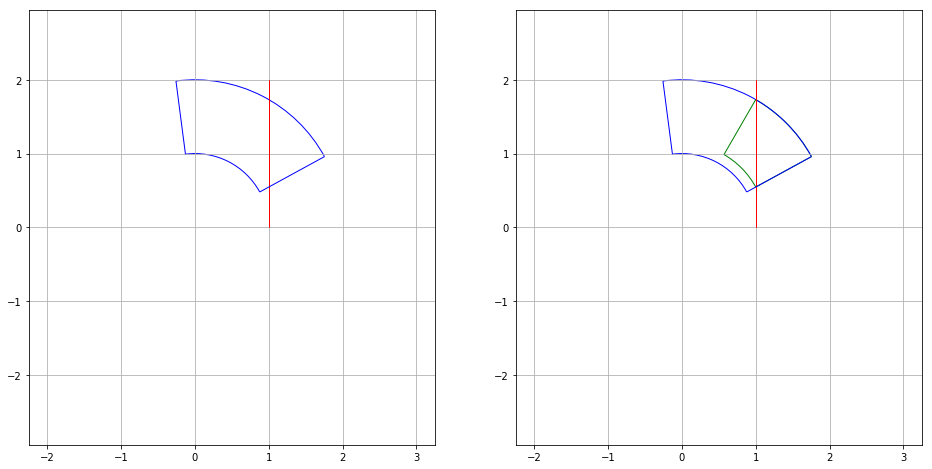

In [42]:
I2 = Interval(1e-6,2,np.pi/2,np.pi/2,origin=(1,0))
I1 = Interval(1,2,0.5,1.7,origin=(0,0))
t0 = time.time()
J = fast_inclusion(I1,I2)
t1 = time.time()
print("computation time = ",t1-t0)
fig= plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,2,1)
I2.draw(ax,'red')
I1.draw(ax,'blue')
plt.axis('equal')
plt.grid()
ax1 = fig.add_subplot(1,2,2)
J.draw(ax1,'green')
I2.draw(ax1,'red')
I1.draw(ax1,'blue')
plt.axis('equal')
plt.grid()
plt.show()



rs =  [] thetas =  []
computation time =  2.3111939430236816


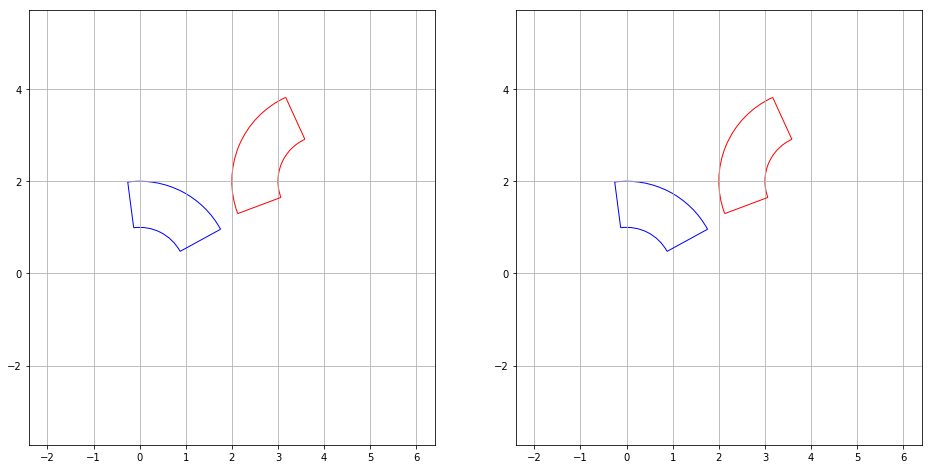

In [45]:
I2 = Interval(1,2,2,3.5,origin=(4,2))
I1 = Interval(1,2,0.5,1.7,origin=(0,0))
t0 = time.time()
J = fast_inclusion(I1,I2)
t1 = time.time()
print("computation time = ",t1-t0)
fig= plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,2,1)
I2.draw(ax,'red')
I1.draw(ax,'blue')
plt.axis('equal')
plt.grid()
ax1 = fig.add_subplot(1,2,2)
J.draw(ax1,'green')
I2.draw(ax1,'red')
I1.draw(ax1,'blue')
plt.axis('equal')
plt.grid()
plt.show()



computation time =  2.537008285522461


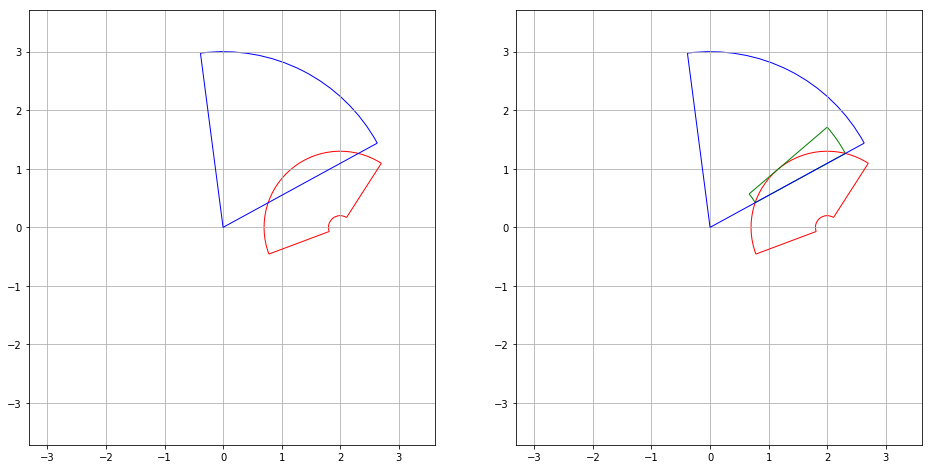

In [65]:
I2 = Interval(0.2,1.3,1,3.5,origin=(2,0))
I1 = Interval(0,3,0.5,1.7,origin=(0,0))
t0 = time.time()
J = fast_inclusion(I1,I2)
t1 = time.time()
print("computation time = ",t1-t0)
fig= plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,2,1)
I2.draw(ax,'red')
I1.draw(ax,'blue')
plt.axis('equal')
plt.grid()
ax1 = fig.add_subplot(1,2,2)
J.draw(ax1,'green')
I2.draw(ax1,'red')
I1.draw(ax1,'blue')
plt.axis('equal')
plt.grid()
plt.show()



computation time =  2.6485936641693115


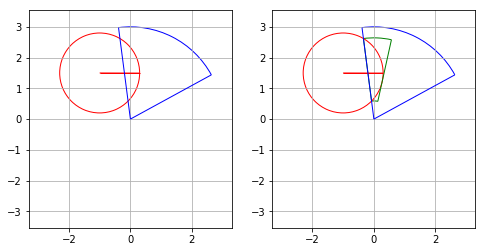

In [71]:
I2 = Interval(0,1.3,0,6.28,origin=(-1,1.5))
I1 = Interval(0,3,0.5,1.7,origin=(0,0))
t0 = time.time()
J = fast_inclusion(I1,I2)
t1 = time.time()
print("computation time = ",t1-t0)
fig= plt.figure(figsize = (8,4))
ax = fig.add_subplot(1,2,1)
I2.draw(ax,'red')
I1.draw(ax,'blue')
plt.axis('equal')
plt.grid()
ax1 = fig.add_subplot(1,2,2)
J.draw(ax1,'green')
I2.draw(ax1,'red')
I1.draw(ax1,'blue')
plt.axis('equal')
plt.grid()
plt.show()



In [23]:
aaa = np.array([[1,2],[28,3],[34,66]])
max(aaa[:,1])

66

1